In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Задание взято с платформы https://karpov.courses/
### Задача №1 

В этот раз никаких такси и товаров, потренируемся на характеристиках покемонов! В исходном датасете мультииндексов нет, поэтому будем создавать их сами. Данные сохранены в переменную pokemon.

Сначала измените названия исходных столбцов:

- пробелы и точки нужно заменить на "_" (напр. Sp. Atk → sp_atk).
- приведите все названия к нижнему регистру
- колонку "#" переименовать в "id"
- Полученные результаты запишите в исходный датафрейм pokemon.

- Затем сгруппируйте данные по поколению покемонов (generation), и с помощью value_counts() посчитайте, сколько в каком поколении легендарных покемонов (legendary), а также сколько в этих поколениях нелегендарных покемонов. Полученный объект приведите к формату датафрейма (.to_frame()) и сохраните в legends.

- Данные сохранены в переменную pokemon

In [3]:
pokemon = pd.read_csv('Pokemon.csv')

In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Для начала заменим все названия колонок

In [15]:
pokemon = pokemon.rename(columns={'#': 'id'})


pokemon_columns = pokemon.columns
new_pokemon_columns = []

for column in pokemon_columns:
    
    new_column = column.replace('. ', '_').lower()
    new_column = new_column.replace(' ', '_')
    new_pokemon_columns.append(new_column)

    
for i in range(len(pokemon_columns)):
    
    pokemon = pokemon.rename(columns={pokemon_columns[i]: new_pokemon_columns[i]})
    

In [19]:
pokemon.head()

,id,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### Выполним вторую часть задания
Затем сгруппируйте данные по поколению покемонов (generation), и с помощью value_counts() посчитайте, сколько в каком поколении легендарных покемонов (legendary), а также сколько в этих поколениях нелегендарных покемонов. Полученный объект приведите к формату датафрейма (.to_frame()) и сохраните в legends.

In [35]:
legends = pokemon.groupby(['generation', 'legendary'])\
       .aggregate({'legendary': 'count'})



In [33]:
legends = pokemon.groupby('generation')\
       .legendary \
       .value_counts() \
       .to_frame()
legends
# с разбора

legendary
generation legendary           
1          False            160
           True               6
2          False            101
           True               5
3          False            142
           True              18
4          False            108
           True              13
5          False            150
           True              15
6          False             74
           True               8

### Задача №2 
Как вы могли заметить,  есть только одна колонка со значениями, которая называется legendary, а в качестве индекса используются две колонки — generation и legendary. Два одинаковых названия — не очень хорошо, поэтому необходимо переименовать колонку legendary в legendary_count. 

Используйте датафрейм legends, полученный на предыдущем шаге, и измените в нём название столбца, перезаписав его в ту же переменную. Затем используйте unstack, чтобы поместить уровень индекса legendary в уровень оси столбцов. Иными словами, должно получиться две колонки – False & True. Результат сохраните в legends_unstacked.

Пример ожидаемого формата названия колонок:

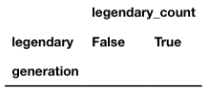


In [36]:
legends = legends.rename(columns={'legendary': 'legendary_count'})
legends_unstacked = legends.unstack() 
legends_unstacked

legendary_count      
legendary            False True 
generation                      
1                      160     6
2                      101     5
3                      142    18
4                      108    13
5                      150    15
6                       74     8

In [ ]:
legends_unstacked

### Задача №3 
Немного усложним задачу. Теперь попробуем узнать, среди каких типов покемонов и какого поколения больше всего легендарных.

Сгруппируйте датасет pokemon по переменным generation и type_1, посчитайте количество легендарных покемонов внутри групп. Приведите данные в формат датафрейма, а затем используйте unstack(). В качестве ответа выберите вид и поколение покемона, среди которых больше всего легендарных.

In [42]:
pokemon.groupby(['generation', 'type_1']) \
       .legendary \
       .value_counts() \
       .to_frame() \
       .rename(columns={'legendary': 'legendary_counts'}) \
       .unstack() \
       .sort_values(('legendary_counts', True), ascending=False)

legendary_counts      
legendary                     False True 
generation type_1                        
3          Dragon               6.0   6.0
5          Dragon               4.0   5.0
3          Psychic              8.0   4.0
1          Psychic              8.0   3.0
4          Psychic              5.0   3.0
...                             ...   ...
6          Ice                  2.0   NaN
           Normal               4.0   NaN
           Poison               2.0   NaN
           Steel                5.0   NaN
           Water                5.0   NaN

[98 rows x 2 columns]

### Задача №4

Преобразуйте представленные данные в длинный формат и запишите в переменную avocado_agg_long. В качестве индекса используйте type

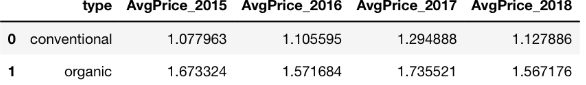


In [43]:
avocado_agg = pd.DataFrame({'type' : ['conventional', 'organic'],
                            'AvgPrice_2015' : [1.077963, 1.673324],
                            'AvgPrice_2016' : [1.105595, 1.571684],
                            'AvgPrice_2017' : [1.294888, 1.735521],
                            'AvgPrice_2018' : [1.127886, 1.567176],
                            })
avocado_agg


,type,AvgPrice_2015,AvgPrice_2016,AvgPrice_2017,AvgPrice_2018
0,conventional,1.077963,1.105595,1.294888,1.127886
1,organic,1.673324,1.571684,1.735521,1.567176


In [ ]:
avocado_agg_long = pd.wide_to_long(avocado_agg, 'AvgPrice', i='type', j='year', sep='_')
avocado_agg_long

In [45]:
pd.wide_to_long(avocado_agg, 'AvgPrice', i='type', j='year', sep='_')

,,AvgPrice
type,year,
conventional,2015,1.077963
organic,2015,1.673324
conventional,2016,1.105595
organic,2016,1.571684
conventional,2017,1.294888
organic,2017,1.735521
conventional,2018,1.127886
organic,2018,1.567176


### Задача №4
Имеется набор данных о супергероях в широком формате. 

В первой колонке Name находятся их имена, а остальные 167 столбцов — различные характеристики (суперсилы), принимающие значение либо True, либо False. 

Давайте преобразуем датафрейм так, чтобы "собрать" эти признаки в один столбец под названием superpower, а в качестве значений поместить туда списки имеющихся у того или иного героя суперсил. 

То есть привести в следующий формат:

Сначала приведите данные к длинному формату, где единственным идентификатором будет имя героя Name. Новый столбец с названиями суперсил переименуйте в superpower. Полученный датафрейм запишите в superheroes_long.

Для того, чтобы соединить силы в списки и привести данные в желаемую форму, отфильтруйте колонку value так, чтобы остались строки только со значением True. Сгруппируйте датасет по Name, после чего возьмите столбец superpower и используйте .apply(list). Результат сохраните в superheroes_powers. Обратите внимание, что результирующий объект тоже должен быть датафреймом, а колонки должно быть всего две — Name и superpower.

In [50]:
superheroes = pd.read_csv("superheroes_power_matrix.csv")
superheroes

,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
superheroes_long = superheroes.melt(id_vars=['Name'], 
                 value_vars=superheroes.columns[1:-1],
                 var_name='superpower')

superheroes_long

,Name,superpower,value
0,3-D Man,Agility,True
1,A-Bomb,Agility,False
2,Abe Sapien,Agility,True
3,Abin Sur,Agility,False
4,Abomination,Agility,False
...,...,...,...
110717,Yellowjacket II,Omnipresent,False
110718,Ymir,Omnipresent,False
110719,Yoda,Omnipresent,False
110720,Zatanna,Omnipresent,False


In [73]:
superheroes_powers = superheroes_long.query('value == True') \
                .groupby('Name') \
                .superpower \
                .apply(list) \
                .to_frame() \
                .reset_index()

superheroes_powers

,Name,superpower
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,[Lantern Power Ring]
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre..."
...,...,...
662,Yellowjacket II,"[Flight, Energy Blasts, Size Changing]"
663,Ymir,"[Cold Resistance, Durability, Longevity, Super..."
664,Yoda,"[Agility, Stealth, Danger Sense, Marksmanship,..."
665,Zatanna,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."
